# Netflix Stock Closing Price Prediction
Complete ML solution notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-01,353.859985,365.390015,349.910004,361.989990,361.989990,8005200
1,2023-02-02,365.160004,368.320007,358.429993,366.890015,366.890015,7857000
2,2023-02-03,359.079987,379.429993,359.000000,365.899994,365.899994,9402000
3,2023-02-06,363.640015,368.450012,360.679993,361.480011,361.480011,4994900
4,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400


## Exploratory Analysis

In [4]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2023-08-01 05:44:13.386454272,404.181354,409.754742,398.958446,404.270478,404.270478,6.135308e+06
min,2023-02-01 00:00:00,287.339996,297.450012,285.329987,292.760010,292.760010,1.404700e+06
25%,2023-05-02 12:00:00,348.994995,356.860001,344.490005,348.119995,348.119995,3.966000e+06
50%,2023-08-02 00:00:00,412.000000,418.839996,407.399994,411.690002,411.690002,5.128900e+06
75%,2023-10-30 12:00:00,444.729996,448.574997,439.175003,444.944992,444.944992,6.880600e+06
max,2024-01-31 00:00:00,571.349976,579.640015,562.679993,575.789978,575.789978,2.807440e+07
std,NaN,60.849872,61.318707,60.722608,61.193722,61.193722,3.814621e+06


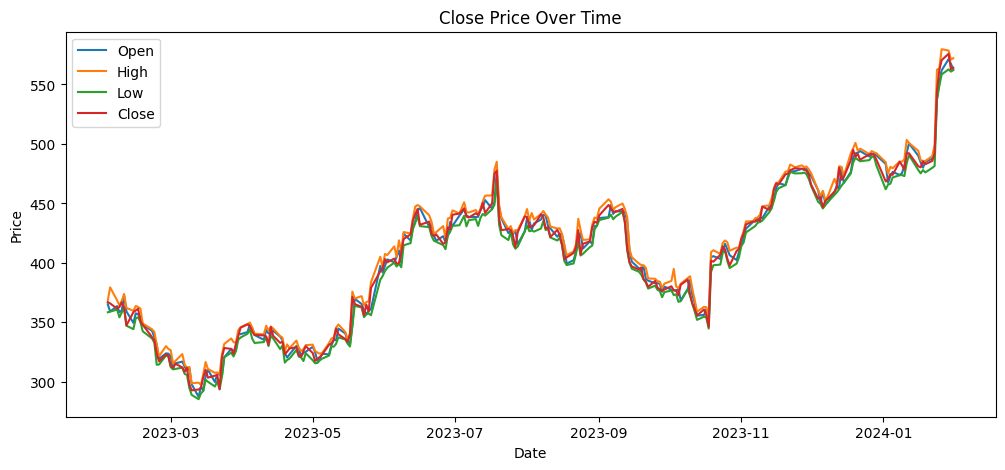

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Open'], label='Open')
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['Close'], label='Close')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

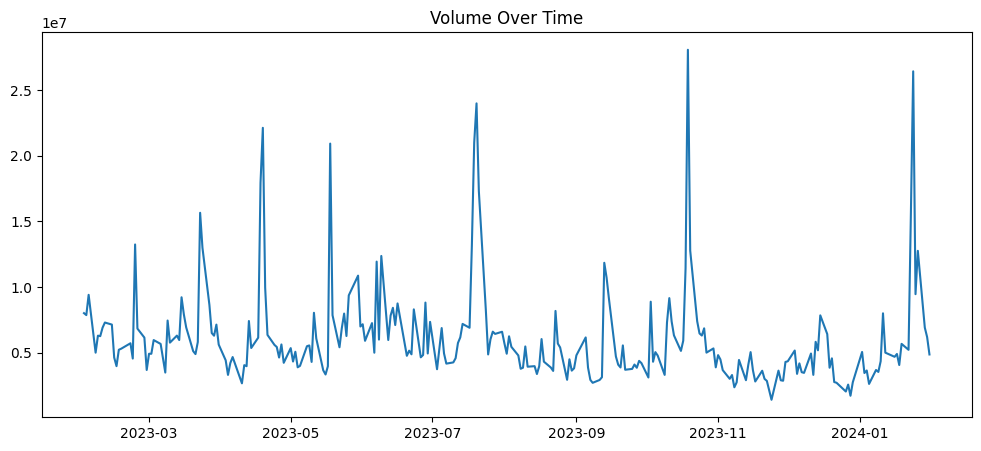

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volume'])
plt.title('Volume Over Time')
plt.show()

## Feature Engineering

In [7]:
df['Amplitude'] = df['High'] - df['Low']
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Close_lag1'] = df['Close'].shift(1)
df = df.dropna()

features = ['Open','High','Low','Volume','Amplitude','DayOfWeek','Close_lag1']
X = df[features]
y = df['Close']

split_idx = int(len(df)*0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

## Linear Regression

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, lr_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, lr_pred)

mse_lr, rmse_lr, r2_lr

(10.060392665450529, np.float64(3.1718122052622424), 0.9891926730242863)

## KNN Regression

In [9]:
ks = [2,3,5,7,10,15]
results = {}
for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results[k] = r2_score(y_test, pred)
results

{2: -11.265670677730554,
 3: -11.673752219432599,
 5: -10.661965749677634,
 7: -10.330414101740866,
 10: -10.053218750377871,
 15: -10.144158188892947}

In [10]:
best_k = max(results, key=results.get)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

mse_knn = mean_squared_error(y_test, knn_pred)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, knn_pred)

best_k, mse_knn, rmse_knn, r2_knn

(10, 10289.289950772267, np.float64(101.43613730210879), -10.053218750377871)

## Final Predictions Export

In [12]:
final_pred = lr_pred if r2_lr >= r2_knn else knn_pred
pd.DataFrame({'price': final_pred}).to_csv('precos_estimados.csv', index=False)
'File precos_estimados.csv generated.'

'File precos_estimados.csv generated.'